# Project - Machine Learning

## Problem-1

### 1.1) Read the dataset. Do the descriptive statistics and do null value condition check.

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score

#### Read the data

In [2]:
df = pd.read_excel("G://PGP-DSBA//06. Machine Learning//Week-2//Election_Data.xlsx",'Election_Dataset_Two Classes')

To check whether the data has been read properly, check the head of the data.

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


This dataset has an "Unnamed" column showing the serial numbers. Can be removed from the data.

In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


Data has been loaded perfectly. Lets check the dimensions of the data.

In [5]:
df.shape

(1525, 9)

Dataset contains 1525 rows of observations and 9 columns of attributes.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


1. The above command returns that there are no null values.
2. Vote and Gender are object type datatypes.
3. Age is of Continouous integer datatype.
4. Rest of the attributes are integers specifically ordinal type of datatypes.

#### Descriptive Statistics

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525,NaN,NaN,NaN,54.1823,15.7112,24,41,53,67,93
economic.cond.national,1525,NaN,NaN,NaN,3.2459,0.880969,1,3,3,4,5
economic.cond.household,1525,NaN,NaN,NaN,3.14033,0.929951,1,3,3,4,5
Blair,1525,NaN,NaN,NaN,3.33443,1.17482,1,2,4,4,5
Hague,1525,NaN,NaN,NaN,2.74689,1.2307,1,2,2,4,5
Europe,1525,NaN,NaN,NaN,6.72852,3.29754,1,4,6,10,11
political.knowledge,1525,NaN,NaN,NaN,1.5423,1.08331,0,0,2,2,3
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Vote:
1. There are 2 unique values for the Vote attributes.
2. Out of 1525 voters 1063 people voted for Labour party making it majority voted party.

##### Age:
1. The minimum age of the person voted is 24 and the eldest person is of 93 years.
2. The average age of the voters is 54 years 
3. 75% of the voters are under 67 years.

##### Gender:
1. Two unique classes coventionally.
2. Out of 1525 voters the majority voters are Female!! 

#### Null Value Check

In [8]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

There are no null values in the data. But there is a presence of zeros in the attribute "political.knowledge". The zero here signifies the least knowledge of the voter about the politics.

#### Univariate Analysis:

##### Vote:

In [9]:
df['vote'].value_counts(normalize=True)


Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

70% of the people voted for Labour party and 30% for the Conservative party.

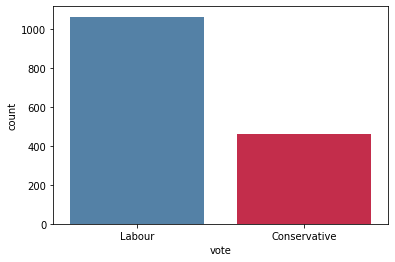

In [10]:
sns.countplot(df['vote'],palette=['steelblue','crimson'])

##### Assessment of current national economic conditions

In [11]:
df['economic.cond.national'].value_counts()


3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64

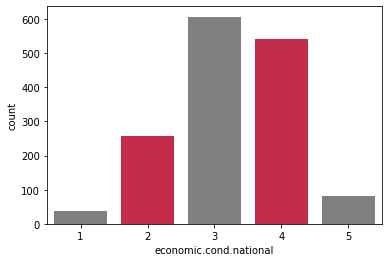

In [12]:
sns.countplot(df['economic.cond.national'],palette=['grey','crimson'])

#####  Assessment of current household economic conditions

In [13]:
df['economic.cond.household'].value_counts()


3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

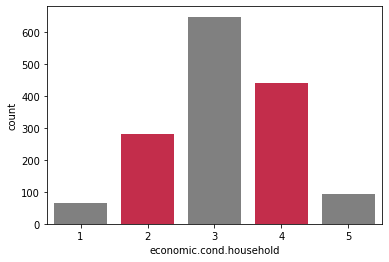

In [14]:
sns.countplot(df['economic.cond.household'],palette=['grey','crimson'])

#####  Assessment of the Labour leader

In [15]:
df['Blair'].value_counts()


4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64

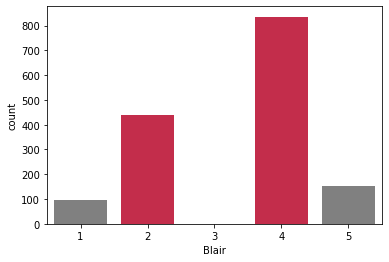

In [16]:
sns.countplot(df['Blair'],palette=['grey','crimson'])

##### Assessment of the Conservative leader

In [17]:
df['Hague'].value_counts()


2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64

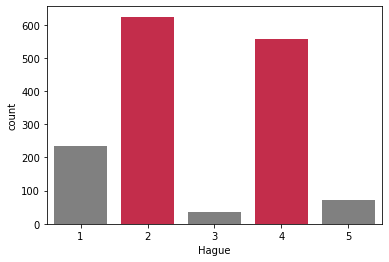

In [18]:
sns.countplot(df['Hague'],palette=['grey','crimson'])

#####  ‘Eurosceptic’ sentiment.

In [19]:
df['Europe'].value_counts()


11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64

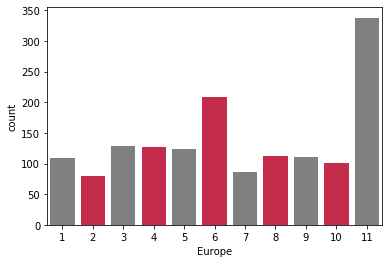

In [20]:
sns.countplot(df['Europe'],palette=['grey','crimson'])

##### Knowledge of parties' positions on European integration

In [21]:
df['political.knowledge'].value_counts()

2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64

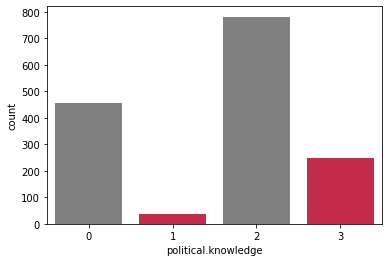

In [22]:
sns.countplot(df['political.knowledge'],palette=['grey','crimson'])

##### Gender

In [23]:
df['gender'].value_counts(normalize=True)

female    0.532459
male      0.467541
Name: gender, dtype: float64

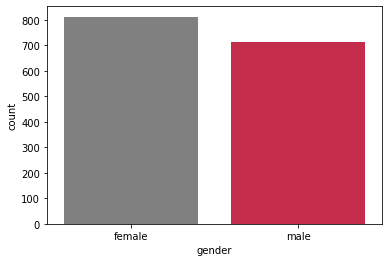

In [24]:
sns.countplot(df['gender'],palette=['grey','crimson'])

##### Age

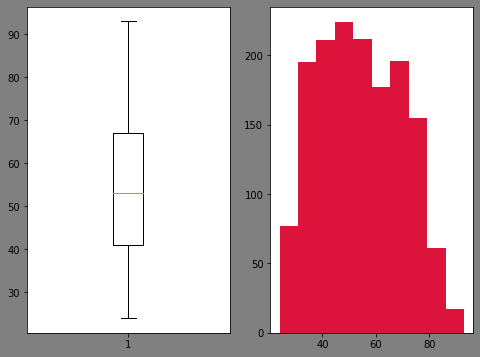

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6),facecolor='grey')
>>> scatter1 = ax1.boxplot(df['age']) 
>>> scatter2 = ax2.hist(df['age'],color='crimson') 

#### Checking for Duplicates

In [26]:
dups = df.duplicated()
print("Number of duplicated rows = %d " %(dups.sum()))

df[dups]

Number of duplicated rows = 8 


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [27]:
df =  df.drop_duplicates()

In [28]:
df.shape

(1517, 9)

In [29]:
dups = df.duplicated()
print("Number of duplicated rows = %d " %(dups.sum()))

Number of duplicated rows = 0 


#### Bi-Variate Analysis

##### Vote Vs Age

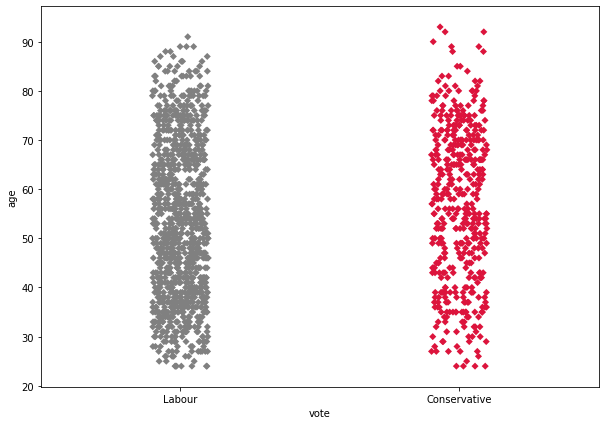

In [30]:
plt.figure(figsize=(10,7))
sns.stripplot(df["vote"], df['age'], jitter=True,palette=['grey','crimson'],size=5, marker="D")  ### Distribution of values
plt.show()

##### Vote vs Assessment of current national economic conditions

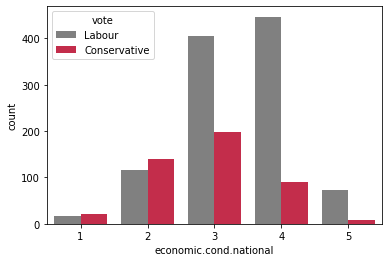

In [31]:
sns.countplot(df['economic.cond.national'],hue=df['vote'],palette=['grey','crimson'])

##### Vote vs Assessment of current household economic conditions

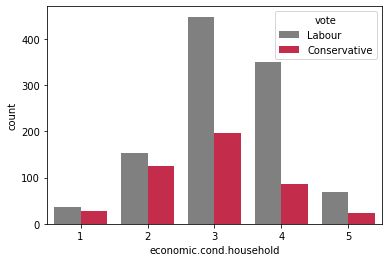

In [32]:
sns.countplot(df['economic.cond.household'],hue=df['vote'],palette=['grey','crimson'])

##### Vote vs Blair

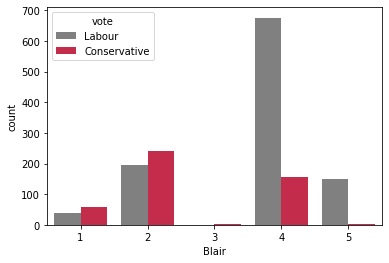

In [33]:
sns.countplot(df['Blair'],hue=df['vote'],palette=['grey','crimson'])

##### Vote vs Hague

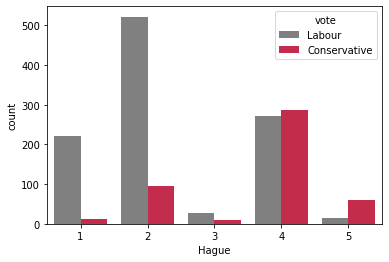

In [34]:
sns.countplot(df['Hague'],hue=df['vote'],palette=['grey','crimson'])

##### Vote vs Eurosceptic sentiment

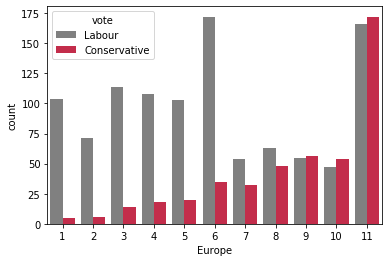

In [35]:
sns.countplot(df['Europe'],hue=df['vote'],palette=['grey','crimson'],orient='h')

##### Vote vs Political Knowledge

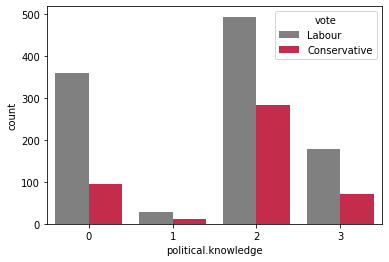

In [36]:
sns.countplot(df['political.knowledge'],hue=df['vote'],palette=['grey','crimson'],orient='h')

##### Vote Vs Gender

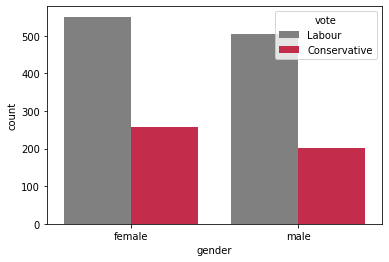

In [37]:
sns.countplot(df['gender'],hue=df['vote'],palette=['grey','crimson'],orient='h')

In [38]:
df.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


<Figure size 720x720 with 0 Axes>

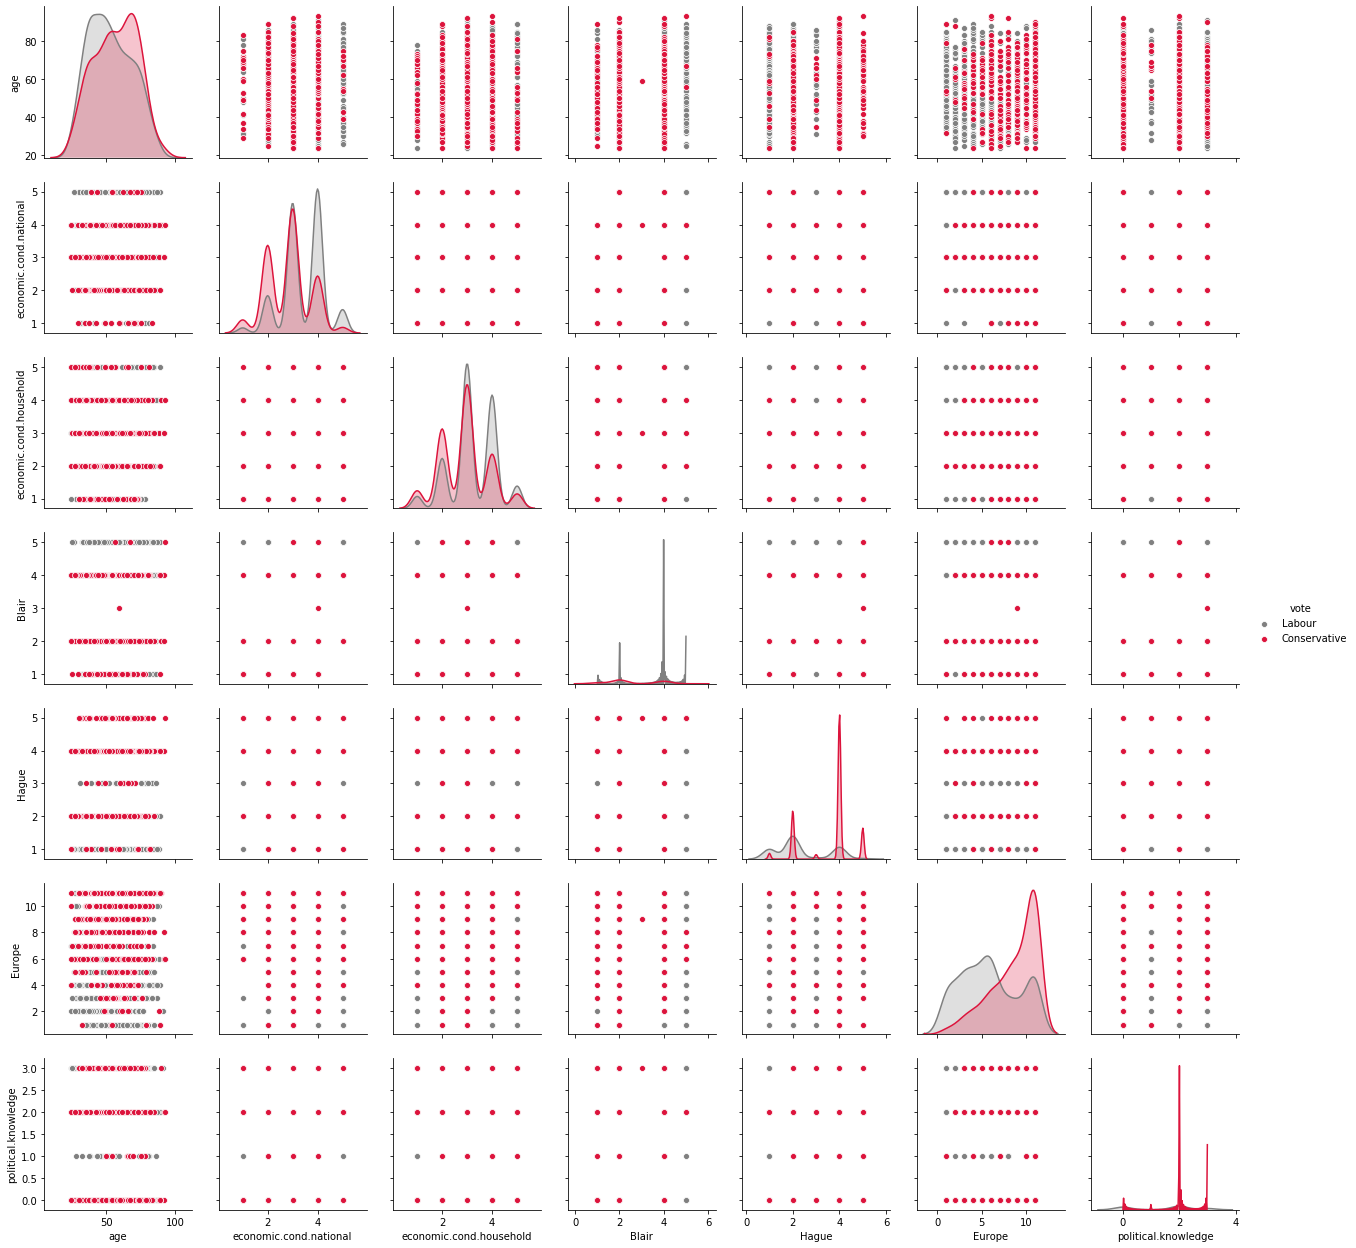

In [39]:
plt.figure(figsize=(10,10))
sns.pairplot(df,hue='vote',palette=['grey','crimson'])
plt.show()

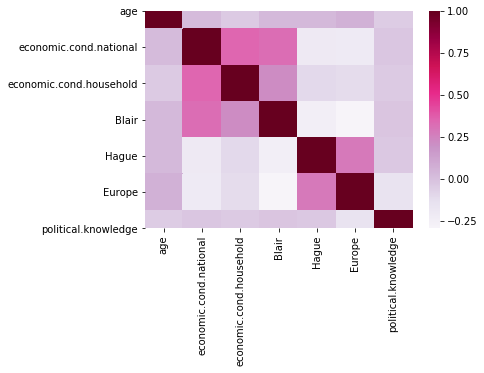

In [40]:
sns.heatmap(df.corr(),cmap='PuRd')

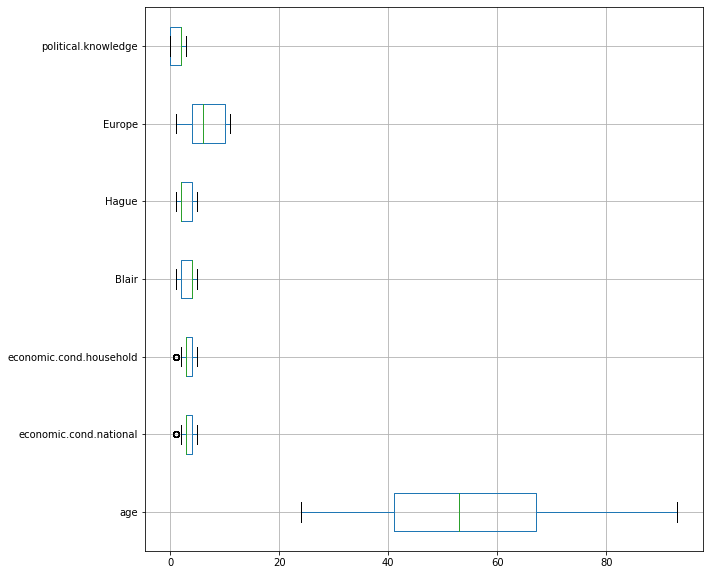

In [41]:
plt.figure(figsize=(10,10))
df.iloc[:,:8].boxplot(vert=0)
plt.show()

In [42]:
print(pd.Categorical(df['vote'].unique()))
print(pd.Categorical(df['vote'].unique()).codes)
df['vote'] = pd.Categorical(df['vote']).codes 

[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


In [43]:
print(pd.Categorical(df['gender'].unique()))
print(pd.Categorical(df['gender'].unique()).codes)
df['gender'] = pd.Categorical(df['gender']).codes 

[female, male]
Categories (2, object): [female, male]
[0 1]


In [44]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1517 non-null int8
age                        1517 non-null int64
economic.cond.national     1517 non-null int64
economic.cond.household    1517 non-null int64
Blair                      1517 non-null int64
Hague                      1517 non-null int64
Europe                     1517 non-null int64
political.knowledge        1517 non-null int64
gender                     1517 non-null int8
dtypes: int64(7), int8(2)
memory usage: 137.8 KB


In [46]:
df.describe()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,0.696770,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541,0.467370
std,0.459805,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417,0.499099
min,0.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,0.000000
50%,1.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,0.000000
75%,1.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,1.000000
max,1.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000,1.000000


#### Scale the data

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from scipy.stats import zscore

#### Split the data into test and train data

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df.drop('vote',axis=1)

y = df['vote']

In [50]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.3,random_state=1)

In [51]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (1061, 8)
X_test (456, 8)
y_train (1061,)
y_test (456,)


### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logit = LogisticRegression()
logit.fit(X_train,y_train)

LogisticRegression()

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
y_train_predict = logit.predict(X_train)
Logit_train_acc = logit.score(X_train,y_train)
print(Logit_train_acc)
print(confusion_matrix(y_train,y_train_predict))
print(classification_report(y_train,y_train_predict))

0.8350612629594723
[[199 108]
 [ 67 687]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



Area under Curve is 0.7796745263048757


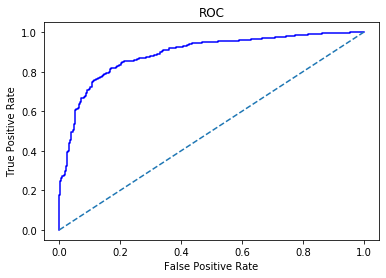

In [56]:
log_train_fpr, log_train_tpr,_=roc_curve(y_train,logit.predict_proba(X_train)[:,1])
plt.plot(log_train_fpr,log_train_tpr,color='blue')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
log_train_auc=roc_auc_score(y_train,logit.predict(X_train))
print('Area under Curve is', log_train_auc)


In [57]:
y_predict = logit.predict(X_test)
Logit_test_acc=logit.score(X_test,y_test)
print(Logit_test_acc)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))


0.8267543859649122
[[110  43]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



Area under Curve is 0.8000711835889471


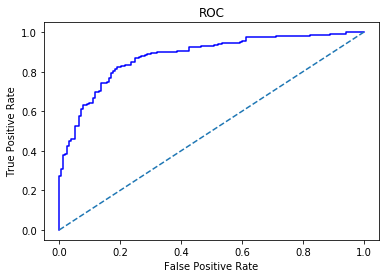

In [58]:
log_test_fpr, log_test_tpr,_=roc_curve(y_test,logit.predict_proba(X_test)[:,1])
plt.plot(log_test_fpr,log_test_tpr,color='blue')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
log_test_auc=roc_auc_score(y_test,logit.predict(X_test))
print('Area under Curve is', log_test_auc)


### Linear Discriminant Analysis

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [60]:
LDA = LinearDiscriminantAnalysis()

In [61]:
LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [62]:
y_train_predict = LDA.predict(X_train)
LDA_train_acc = LDA.score(X_train,y_train)
print(LDA_train_acc)
print(confusion_matrix(y_train,y_train_predict))
print(classification_report(y_train,y_train_predict))

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Area under Curve is 0.7799769308530401


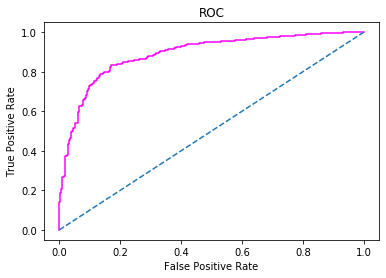

In [63]:
LDA_train_fpr, LDA_train_tpr,_=roc_curve(y_train,LDA.predict_proba(X_train)[:,1])
plt.plot(LDA_train_fpr,LDA_train_tpr,color='magenta')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
LDA_train_auc=roc_auc_score(y_train,LDA.predict(X_train))
print('Area under Curve is', LDA_train_auc)

In [64]:
y_test_predict = LDA.predict(X_test)
LDA_test_acc = LDA.score(X_test,y_test)
print(LDA_test_acc)
print(confusion_matrix(y_test,y_test_predict))
print(classification_report(y_test,y_test_predict))

0.8333333333333334
[[111  42]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



Area under Curve is 0.8066394874781595


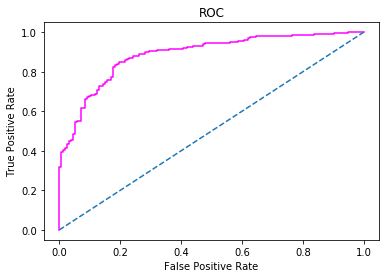

In [65]:
LDA_test_fpr, LDA_test_tpr,_=roc_curve(y_test,LDA.predict_proba(X_test)[:,1])
plt.plot(LDA_test_fpr,LDA_test_tpr,color='magenta')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
LDA_test_auc=roc_auc_score(y_test,LDA.predict(X_test))
print('Area under Curve is', LDA_test_auc)

###  KNN 

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [68]:
y_train_predict = KNN.predict(X_train)
KNN_train_acc = KNN.score(X_train,y_train)
print(KNN_train_acc)
print(confusion_matrix(y_train,y_train_predict))
print(classification_report(y_train,y_train_predict))

0.8529688972667295
[[204 103]
 [ 53 701]]
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



Area under Curve is 0.797101668409093


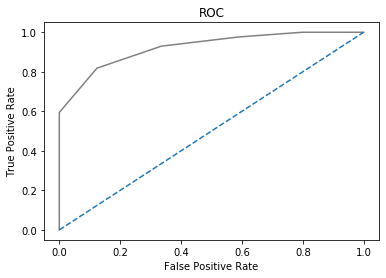

In [69]:
KNN_train_fpr, KNN_train_tpr,_=roc_curve(y_train,KNN.predict_proba(X_train)[:,1])
plt.plot(KNN_train_fpr,KNN_train_tpr,color='grey')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNN_train_auc=roc_auc_score(y_train,KNN.predict(X_train))
print('Area under Curve is', KNN_train_auc)

In [70]:
y_test_predict = KNN.predict(X_test)
KNN_test_acc= KNN.score(X_test,y_test)
print(KNN_test_acc)
print(confusion_matrix(y_test,y_test_predict))
print(classification_report(y_test,y_test_predict))

0.8157894736842105
[[ 99  54]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       153
           1       0.83      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



Area under Curve is 0.7740244612696563


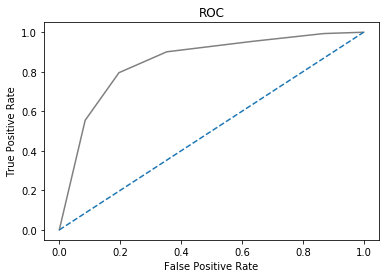

In [71]:
KNN_test_fpr, KNN_test_tpr,_=roc_curve(y_test,KNN.predict_proba(X_test)[:,1])
plt.plot(KNN_test_fpr,KNN_test_tpr,color='grey')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNN_test_auc=roc_auc_score(y_test,KNN.predict(X_test))
print('Area under Curve is', KNN_test_auc)

### Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

In [74]:
y_train_predict = NB.predict(X_train)
NB_train_acc = NB.score(X_train,y_train)
print(NB_train_acc)
print(confusion_matrix(y_train,y_train_predict))
print(classification_report(y_train,y_train_predict))

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



Area under Curve is 0.7912609405645462


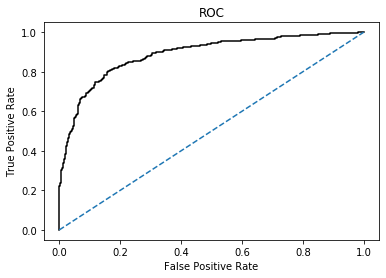

In [75]:
NB_train_fpr, NB_train_tpr,_=roc_curve(y_train,NB.predict_proba(X_train)[:,1])
plt.plot(NB_train_fpr,NB_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
NB_train_auc=roc_auc_score(y_train,NB.predict(X_train))
print('Area under Curve is', NB_train_auc)

In [76]:
y_test_predict = NB.predict(X_test)
NB_test_acc =NB.score(X_test,y_test)
print(NB_test_acc)
print(confusion_matrix(y_test,y_test_predict))
print(classification_report(y_test,y_test_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



Area under Curve is 0.8000064712353588


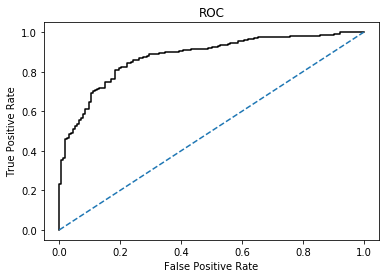

In [77]:
NB_test_fpr, NB_test_tpr,_=roc_curve(y_test,NB.predict_proba(X_test)[:,1])
plt.plot(NB_test_fpr,NB_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
NB_test_auc=roc_auc_score(y_test,NB.predict(X_test))
print('Area under Curve is', NB_test_auc)

### Support Vector Machine

In [78]:
from sklearn import svm

In [79]:
SVM = svm.SVC(random_state=1,probability=True)
SVM.fit(X_train,y_train)

SVC(probability=True, random_state=1)

In [80]:
y_train_predict = SVM.predict(X_train)
SVM_train_acc= SVM.score(X_train,y_train)
print(SVM_train_acc)
print(confusion_matrix(y_train,y_train_predict))
print(classification_report(y_train,y_train_predict))

0.7323279924599434
[[ 26 281]
 [  3 751]]
              precision    recall  f1-score   support

           0       0.90      0.08      0.15       307
           1       0.73      1.00      0.84       754

    accuracy                           0.73      1061
   macro avg       0.81      0.54      0.50      1061
weighted avg       0.78      0.73      0.64      1061



Area under Curve is 0.5403558869525398


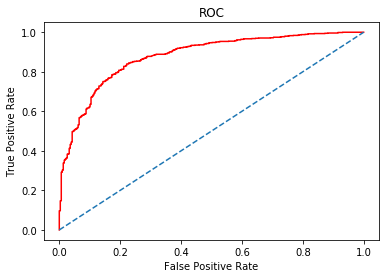

In [81]:
svm_train_fpr, svm_train_tpr,_=roc_curve(y_train,SVM.predict_proba(X_train)[:,1])
plt.plot(svm_train_fpr,svm_train_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
svm_train_auc=roc_auc_score(y_train,SVM.predict(X_train))
print('Area under Curve is', svm_train_auc)

In [82]:
y_test_predict = SVM.predict(X_test)
SVM_test_acc = SVM.score(X_test,y_test)
print(SVM_test_acc)
print(confusion_matrix(y_test,y_test_predict))
print(classification_report(y_test,y_test_predict))

0.6864035087719298
[[ 12 141]
 [  2 301]]
              precision    recall  f1-score   support

           0       0.86      0.08      0.14       153
           1       0.68      0.99      0.81       303

    accuracy                           0.69       456
   macro avg       0.77      0.54      0.48       456
weighted avg       0.74      0.69      0.59       456



Area under Curve is 0.5359153562415065


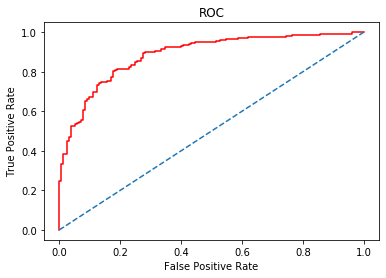

In [83]:
svm_test_fpr, svm_test_tpr,_=roc_curve(y_test,SVM.predict_proba(X_test)[:,1])
plt.plot(svm_test_fpr,svm_test_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
svm_test_auc=roc_auc_score(y_test,SVM.predict(X_test))
print('Area under Curve is', svm_test_auc)

### Model Tuning using GridSearch and Cross-Validation

In [84]:
from sklearn.model_selection import GridSearchCV

#### For Logistic Regression

In [85]:
param_grid = [
    {'penalty' : ['l1','l2','elasticnet','none'],
     'C': np.logspace(-4,4,20),
    'solver': ['newton-cg','lbfgs','linlinear','sag','saga'],
     'max_iter':[100,1000,2500]
    }
]

In [86]:
logit_tuned = GridSearchCV(logit,param_grid = param_grid,cv=3,verbose=True,n_jobs=-1)

In [87]:
best_logit_tuned=logit_tuned.fit(X_train,y_train)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1314 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2025 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3067 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  4.0min finished


In [88]:
best_grid = best_logit_tuned.best_estimator_

In [89]:
best_grid

LogisticRegression(C=0.615848211066026)

In [90]:
y_train_predict = best_logit_tuned.predict(X_train)
logit_tuned_train_acc = best_logit_tuned.score(X_train,y_train)
print(logit_tuned_train_acc)
print(confusion_matrix(y_train,y_train_predict))
print(classification_report(y_train,y_train_predict))

0.8312912346842601
[[196 111]
 [ 68 686]]
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Area under Curve is 0.7741254028460589


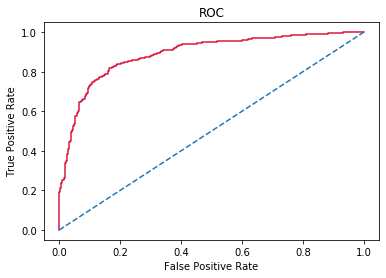

In [91]:
log_tune_train_fpr, log_tune_train_tpr,_=roc_curve(y_train,best_logit_tuned.predict_proba(X_train)[:,1])
plt.plot(log_tune_train_fpr,log_tune_train_tpr,color='crimson')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
log_tune_train_auc=roc_auc_score(y_train,best_logit_tuned.predict(X_train))
print('Area under Curve is', log_tune_train_auc)


In [92]:
y_test_predict = best_logit_tuned.predict(X_test)
logit_tuned_test_acc = best_logit_tuned.score(X_test,y_test)
print(logit_tuned_test_acc)
print(confusion_matrix(y_test,y_test_predict))
print(classification_report(y_test,y_test_predict))

0.8355263157894737
[[113  40]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



Area under Curve is 0.8115252701740763


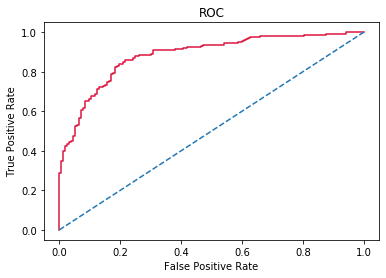

In [93]:
log_tune_test_fpr, log_tune_test_tpr,_=roc_curve(y_test,best_logit_tuned.predict_proba(X_test)[:,1])
plt.plot(log_tune_test_fpr,log_tune_test_tpr,color='crimson')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
log_tune_test_auc=roc_auc_score(y_test,best_logit_tuned.predict(X_test))
print('Area under Curve is', log_tune_test_auc)

#### For LDA

In [94]:
param_grid = [
    {
    'solver': ['svd','lsqr','eigen'],
     'shrinkage':['none','auto']
    }
]

In [95]:
LDA_tuned = GridSearchCV(LDA,param_grid = param_grid,cv=3,verbose=True,n_jobs=-1)

In [96]:
best_LDA_tuned=LDA_tuned.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.8s finished


In [97]:
best_LDA_tuned.best_estimator_

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [98]:
y_train_predict = best_LDA_tuned.predict(X_train)
LDA_tuned_train_acc = best_LDA_tuned.score(X_train,y_train)
print(LDA_tuned_train_acc)
print(confusion_matrix(y_train,y_train_predict))
print(classification_report(y_train,y_train_predict))

0.8331762488218661
[[200 107]
 [ 70 684]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Area under Curve is 0.7793138008795653


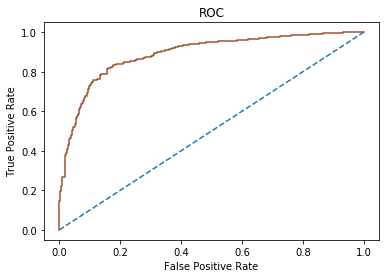

In [99]:
LDA_tune_train_fpr, LDA_tune_train_tpr,_=roc_curve(y_train,best_LDA_tuned.predict_proba(X_train)[:,1])
plt.plot(LDA_tune_train_fpr,LDA_tune_train_tpr,color='sienna')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
LDA_tune_train_auc=roc_auc_score(y_train,best_LDA_tuned.predict(X_train))
print('Area under Curve is', LDA_tune_train_auc)


In [100]:
y_test_predict = best_LDA_tuned.predict(X_test)
LDA_tuned_test_acc= best_LDA_tuned.score(X_test,y_test)
print(LDA_tuned_test_acc)
print(confusion_matrix(y_test,y_test_predict))
print(classification_report(y_test,y_test_predict))

0.8355263157894737
[[113  40]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



Area under Curve is 0.8115252701740763


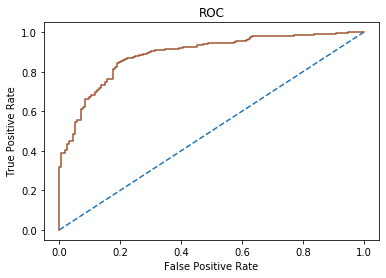

In [101]:
LDA_tune_test_fpr, LDA_tune_test_tpr,_=roc_curve(y_test,best_LDA_tuned.predict_proba(X_test)[:,1])
plt.plot(LDA_tune_test_fpr,LDA_tune_test_tpr,color='sienna')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
LDA_tune_test_auc=roc_auc_score(y_test,best_LDA_tuned.predict(X_test))
print('Area under Curve is', LDA_tune_test_auc)

#### For KNN

In [102]:
param_grid = [
    { 'n_neighbors':np.arange(1,50),
    'weights': ['uniform','distance'],
    }
]

In [103]:
KNN_tuned = GridSearchCV(KNN,param_grid = param_grid,cv=3,verbose=True,n_jobs=-1)

In [104]:
best_KNN_tuned=KNN_tuned.fit(X_train,y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed:   16.5s finished


In [105]:
best_KNN_tuned.best_estimator_

KNeighborsClassifier()

In [106]:
y_train_predict = best_KNN_tuned.predict(X_train)
KNN_tuned_train_acc = best_KNN_tuned.score(X_train,y_train)
print(KNN_tuned_train_acc)
print(confusion_matrix(y_train,y_train_predict))
print(classification_report(y_train,y_train_predict))

0.8529688972667295
[[204 103]
 [ 53 701]]
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



Area under Curve is 0.797101668409093


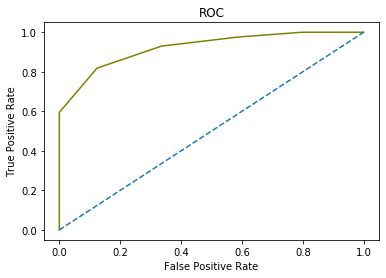

In [107]:
KNN_tune_train_fpr, KNN_tune_train_tpr,_=roc_curve(y_train,best_KNN_tuned.predict_proba(X_train)[:,1])
plt.plot(KNN_tune_train_fpr,KNN_tune_train_tpr,color='olive')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNN_tune_train_auc=roc_auc_score(y_train,best_KNN_tuned.predict(X_train))
print('Area under Curve is', KNN_tune_train_auc)

In [108]:
y_test_predict = best_KNN_tuned.predict(X_test)
KNN_tuned_test_acc = best_KNN_tuned.score(X_test,y_test)
print(KNN_tuned_test_acc)
print(confusion_matrix(y_test,y_test_predict))
print(classification_report(y_test,y_test_predict))

0.8157894736842105
[[ 99  54]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       153
           1       0.83      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



Area under Curve is 0.7740244612696563


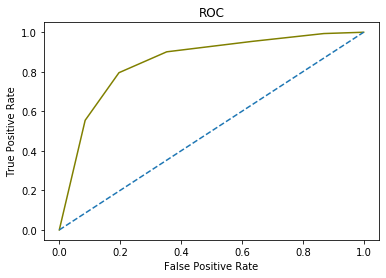

In [109]:
KNN_tune_test_fpr, KNN_tune_test_tpr,_=roc_curve(y_test,best_KNN_tuned.predict_proba(X_test)[:,1])
plt.plot(KNN_tune_test_fpr,KNN_tune_test_tpr,color='olive')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNN_tune_test_auc=roc_auc_score(y_test,best_KNN_tuned.predict(X_test))
print('Area under Curve is', KNN_tune_test_auc)

### For SVM

In [110]:
param_grid = {'C':[0.5,1.0,2.0, 3.0],  
              'kernel':['linear', 'rbf'],   
              'gamma':[0.02, 0.08,0.2,1.0] 
             }

In [111]:
SVM_tuned = GridSearchCV(SVM,param_grid = param_grid,cv=3,verbose=True,n_jobs=-1)

In [112]:
best_SVM_tuned=SVM_tuned.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  1.4min finished


In [113]:
best_SVM_tuned.best_estimator_

SVC(gamma=0.02, kernel='linear', probability=True, random_state=1)

In [114]:
y_train_predict = best_SVM_tuned.predict(X_train)
SVM_tuned_train_acc = best_SVM_tuned.score(X_train,y_train)
print(SVM_tuned_train_acc)
print(confusion_matrix(y_train,y_train_predict))
print(classification_report(y_train,y_train_predict))

0.8341187558906692
[[201 106]
 [ 70 684]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.70       307
           1       0.87      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Area under Curve is 0.7809424653746793


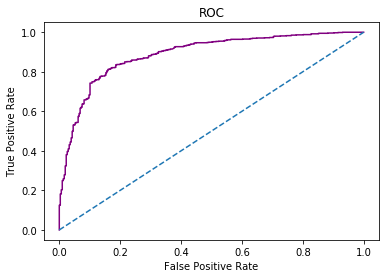

In [115]:
svm_tune_train_fpr, svm_tune_train_tpr,_=roc_curve(y_train,best_SVM_tuned.predict_proba(X_train)[:,1])
plt.plot(svm_tune_train_fpr,svm_tune_train_tpr,color='purple')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
svm_tune_train_auc=roc_auc_score(y_train,best_SVM_tuned.predict(X_train))
print('Area under Curve is', svm_tune_train_auc)

In [116]:
y_test_predict = best_SVM_tuned.predict(X_test)
SVM_tuned_test_acc = best_SVM_tuned.score(X_test,y_test)
print(SVM_tuned_test_acc)
print(confusion_matrix(y_test,y_test_predict))
print(classification_report(y_test,y_test_predict))

0.8421052631578947
[[113  40]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       153
           1       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.82      0.82       456
weighted avg       0.84      0.84      0.84       456



Area under Curve is 0.8164757652235812


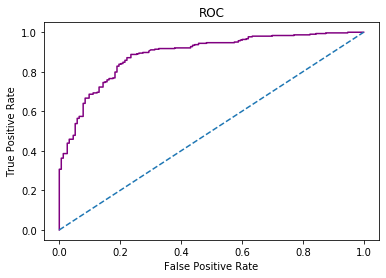

In [117]:
svm_tune_test_fpr, svm_tune_test_tpr,_=roc_curve(y_test, best_SVM_tuned.predict_proba(X_test)[:,1])
plt.plot(svm_tune_test_fpr,svm_tune_test_tpr,color='purple')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
svm_tune_test_auc=roc_auc_score(y_test, best_SVM_tuned.predict(X_test))
print('Area under Curve is', svm_tune_test_auc)

### Bagging -RandomForest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [119]:
y_train_predict = RF_model.predict(X_train)
RF_train_acc =RF_model.score(X_train, y_train)
print(RF_train_acc)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



Area under Curve is 1.0


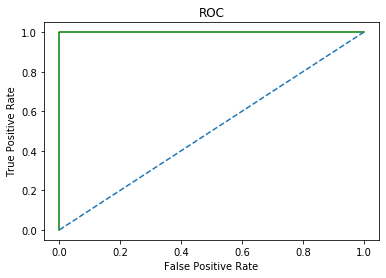

In [120]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,RF_model.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,RF_model.predict(X_train))
print('Area under Curve is', rf_train_auc)

In [121]:
y_test_predict = RF_model.predict(X_test)
RF_test_acc =RF_model.score(X_test, y_test)
print(RF_test_acc)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.831140350877193
[[104  49]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



Area under Curve is 0.7936646605837054


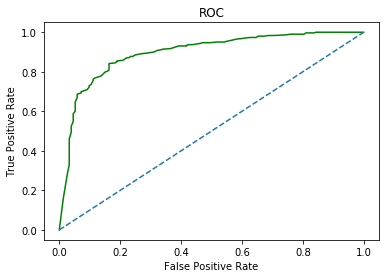

In [122]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,RF_model.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,RF_model.predict(X_test))
print('Area under Curve is', rf_test_auc)

#### Random Forest Tuning with GridSearch

In [123]:
param_grid = {
    'max_depth': [8,9],
    'max_features': [5,6],
    'min_samples_leaf': [6,7],
    'min_samples_split': [20,30],
    'n_estimators': [200,300]
}


In [124]:
RF_tuned = GridSearchCV(RF_model,param_grid = param_grid,cv=3,verbose=True,n_jobs=-1)

In [125]:
best_RF_tuned=RF_tuned.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   59.3s finished


In [126]:
best_RF_tuned.best_estimator_

RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=7,
                       min_samples_split=20, n_estimators=300, random_state=1)

In [127]:
y_train_predict = best_RF_tuned.predict(X_train)
RF_tuned_train_acc =best_RF_tuned.score(X_train, y_train)
print(RF_tuned_train_acc)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8689915174363808
[[218  89]
 [ 50 704]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       307
           1       0.89      0.93      0.91       754

    accuracy                           0.87      1061
   macro avg       0.85      0.82      0.83      1061
weighted avg       0.87      0.87      0.87      1061



Area under Curve is 0.8218923612611133


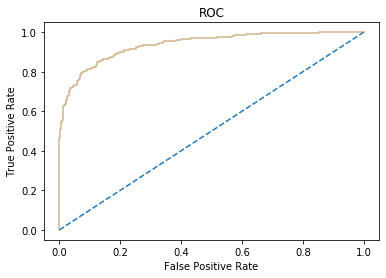

In [128]:
rf_tuned_train_fpr, rf_tuned_train_tpr,_=roc_curve(y_train,best_RF_tuned.predict_proba(X_train)[:,1])
plt.plot(rf_tuned_train_fpr, rf_tuned_train_tpr,color='tan')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_tuned_train_auc=roc_auc_score(y_train,best_RF_tuned.predict(X_train))
print('Area under Curve is', rf_tuned_train_auc)


In [129]:
y_test_predict = best_RF_tuned.predict(X_test)
RF_tuned_test_acc =best_RF_tuned.score(X_test, y_test)
print(RF_tuned_test_acc)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8333333333333334
[[104  49]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



Area under Curve is 0.795314825600207


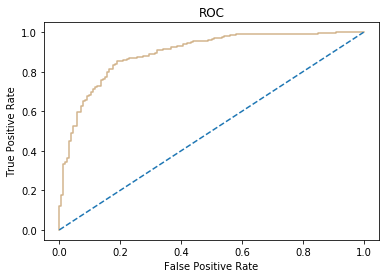

In [130]:
rf_tuned_test_fpr, rf_tuned_test_tpr,_=roc_curve(y_test,best_RF_tuned.predict_proba(X_test)[:,1])
plt.plot(rf_tuned_test_fpr, rf_tuned_test_tpr,color='tan')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_tuned_test_auc=roc_auc_score(y_test,best_RF_tuned.predict(X_test))
print('Area under Curve is', rf_tuned_test_auc)


### Boosting

#### Ada Boost

In [131]:
from sklearn.ensemble import AdaBoostClassifier

In [132]:
ADB = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [133]:
y_train_predict = ADB.predict(X_train)
ADA_train_acc = ADB.score(X_train, y_train)
print(ADA_train_acc)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



Area under Curve is 0.8047676237050605


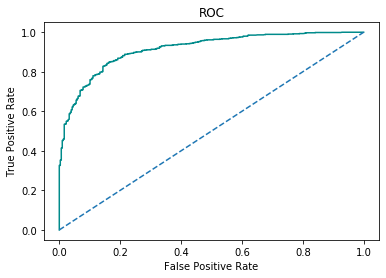

In [134]:
ad_train_fpr, ad_train_tpr,_=roc_curve(y_train,ADB.predict_proba(X_train)[:,1])
plt.plot(ad_train_fpr,ad_train_tpr,color='darkcyan')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
ad_train_auc=roc_auc_score(y_train,ADB.predict(X_train))
print('Area under Curve is', ad_train_auc)

In [135]:
y_test_predict = ADB.predict(X_test)
ADA_test_acc = ADB.score(X_test, y_test)
print(ADA_test_acc)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



Area under Curve is 0.7788455316119848


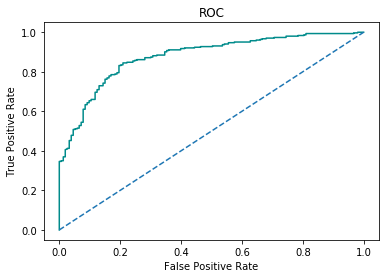

In [136]:
ad_test_fpr, ad_test_tpr,_=roc_curve(y_test,ADB.predict_proba(X_test)[:,1])
plt.plot(ad_test_fpr,ad_test_tpr,color='darkcyan')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
ad_test_auc=roc_auc_score(y_test,ADB.predict(X_test))
print('Area under Curve is', ad_test_auc)

#### XGBoost

In [137]:
import xgboost as xgb

In [138]:
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [139]:
y_train_predict = XGB_model.predict(X_train)
XG_train_acc = XGB_model.score(X_train, y_train)
print(XG_train_acc)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8878416588124411
[[239  68]
 [ 51 703]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       307
           1       0.91      0.93      0.92       754

    accuracy                           0.89      1061
   macro avg       0.87      0.86      0.86      1061
weighted avg       0.89      0.89      0.89      1061



Area under Curve is 0.8554311856850328


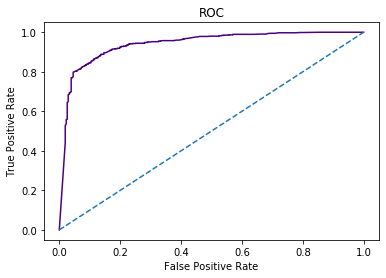

In [140]:
XG_train_fpr, XG_train_tpr,_=roc_curve(y_train,XGB_model.predict_proba(X_train)[:,1])
plt.plot(XG_train_fpr,XG_train_tpr,color='indigo')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
XG_train_auc=roc_auc_score(y_train,XGB_model.predict(X_train))
print('Area under Curve is', XG_train_auc)

In [141]:
y_test_predict = XGB_model.predict(X_test)
XG_test_acc = XGB_model.score(X_test, y_test)
print(XG_test_acc)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8267543859649122
[[107  46]
 [ 33 270]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       153
           1       0.85      0.89      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.82       456



Area under Curve is 0.7952177570698246


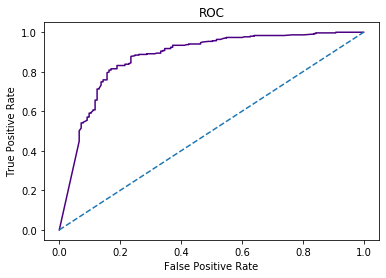

In [142]:
XG_test_fpr, XG_test_tpr,_=roc_curve(y_test,XGB_model.predict_proba(X_test)[:,1])
plt.plot(XG_test_fpr,XG_test_tpr,color='indigo')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
XG_test_auc=roc_auc_score(y_test,XGB_model.predict(X_test))
print('Area under Curve is', XG_test_auc)

In [243]:
param_grid_XG = [
    {'n_estimators' : [100,200],
     'max_depth': [5,6,7],
    'gamma': [0.02,0.2,1.0],
     
    }
]

In [244]:
XGB_tuned = GridSearchCV(XGB_model,param_grid = param_grid_XG,cv=3,verbose=True,n_jobs=-1)

In [245]:
best_XGB_tuned=XGB_tuned.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  1.1min finished


In [246]:
best_XGB_tuned.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.02, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [247]:
y_train_predict = best_XGB_tuned.predict(X_train)
XGB_tuned_train_acc =best_XGB_tuned.score(X_train, y_train)
print(XGB_tuned_train_acc)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))


0.8868991517436381
[[235  72]
 [ 48 706]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       307
           1       0.91      0.94      0.92       754

    accuracy                           0.89      1061
   macro avg       0.87      0.85      0.86      1061
weighted avg       0.89      0.89      0.89      1061



Area under Curve is 0.8509059176250011


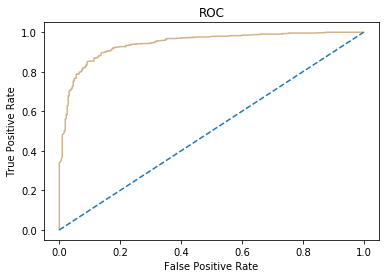

In [248]:
XGB_tuned_train_fpr, XGB_tuned_train_tpr,_=roc_curve(y_train,best_XGB_tuned.predict_proba(X_train)[:,1])
plt.plot(XGB_tuned_train_fpr, XGB_tuned_train_tpr,color='tan')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
XGB_tuned_train_auc=roc_auc_score(y_train,best_XGB_tuned.predict(X_train))
print('Area under Curve is', XGB_tuned_train_auc)

In [250]:
y_test_predict = best_XGB_tuned.predict(X_test)
XGB_tuned_test_acc =best_XGB_tuned.score(X_test, y_test)
print(XGB_tuned_test_acc)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8464912280701754
[[107  46]
 [ 24 279]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       153
           1       0.86      0.92      0.89       303

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.84      0.85      0.84       456



Area under Curve is 0.8100692422183394


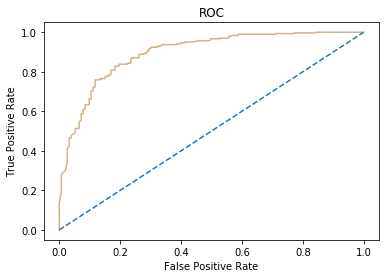

In [252]:
XGB_tuned_test_fpr, XGB_tuned_test_tpr,_=roc_curve(y_test,best_XGB_tuned.predict_proba(X_test)[:,1])
plt.plot(XGB_tuned_test_fpr, XGB_tuned_test_tpr,color='tan')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
XGB_tuned_test_auc=roc_auc_score(y_test,best_XGB_tuned.predict(X_test))
print('Area under Curve is', XGB_tuned_test_auc)

In [255]:
models_train = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression Tuned','LDA','LDA_Tuned','K - Nearest Neighbors','K - Nearest Neighbors Tuned','Naive Bayes_train','Support Vector Machines','Support Vector Machines Tuned', 'Random Forest','Random Forest Tuned', 'Ada Boost','XG Boost','XGB Tuned' 
              ],
    'Train_Score':[Logit_train_acc, logit_tuned_train_acc,LDA_train_acc, LDA_tuned_train_acc, KNN_train_acc, KNN_tuned_train_acc, NB_train_acc, SVM_train_acc,SVM_tuned_train_acc,RF_train_acc,RF_tuned_train_acc,ADA_train_acc,XG_train_acc,XGB_tuned_train_acc],
'Test_Score': [Logit_test_acc, logit_tuned_test_acc,LDA_test_acc, LDA_tuned_test_acc, KNN_test_acc,KNN_tuned_test_acc, NB_test_acc, SVM_test_acc,SVM_tuned_test_acc,RF_test_acc,RF_tuned_test_acc,ADA_test_acc,XG_test_acc,XGB_tuned_test_acc]})
models_train.sort_values(by='Train_Score', ascending=False)

,Model,Train_Score,Test_Score
9,Random Forest,1.000000,0.831140
12,XG Boost,0.887842,0.826754
13,XGB Tuned,0.886899,0.846491
10,Random Forest Tuned,0.868992,0.833333
4,K - Nearest Neighbors,0.852969,0.815789
5,K - Nearest Neighbors Tuned,0.852969,0.815789
11,Ada Boost,0.850141,0.813596
0,Logistic Regression,0.835061,0.826754
6,Naive Bayes_train,0.835061,0.822368
2,LDA,0.834119,0.833333


In [144]:
models_roc_auc = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression Tuned','LDA','LDA_Tuned','K - Nearest Neighbors','K - Nearest Neighbors Tuned','Naive Bayes_train','Support Vector Machines','Support Vector Machines Tuned', 'Random Forest','Random Forest Tuned', 'Ada Boost','XG Boost', 
              ],
    'Train_Score': [log_train_auc, log_tune_train_auc,LDA_train_auc, LDA_tune_train_auc, KNN_train_auc, KNN_tune_train_auc, NB_train_auc, svm_train_auc,svm_tune_train_auc,rf_train_auc,rf_tuned_train_auc,ad_train_auc,XG_train_auc],
'Test_Score': [log_test_auc, log_tune_test_auc,LDA_test_auc, LDA_tune_test_auc, KNN_test_auc,KNN_tune_test_auc, NB_test_auc, svm_test_auc,svm_tune_test_auc,rf_test_auc,rf_tuned_test_auc,ad_test_auc,XG_test_auc]})
models_roc_auc.sort_values(by='Train_Score', ascending=False)

,Model,Train_Score,Test_Score
9,Random Forest,1.000000,0.793665
12,XG Boost,0.855431,0.795218
10,Random Forest Tuned,0.821892,0.795315
11,Ada Boost,0.804768,0.778846
4,K - Nearest Neighbors,0.797102,0.774024
5,K - Nearest Neighbors Tuned,0.797102,0.774024
6,Naive Bayes_train,0.791261,0.800006
8,Support Vector Machines Tuned,0.780942,0.816476
2,LDA,0.779977,0.806639
0,Logistic Regression,0.779675,0.800071


### SMOTE

In [145]:
from imblearn.over_sampling import SMOTE

In [146]:
sm = SMOTE(random_state=10)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [147]:
print(X_train.shape)
print(X_train_res.shape)

(1061, 8)
(1508, 8)


### Random Forest with SMOTE

In [148]:
RF_SM = RF_model.fit(X_train_res, y_train_res)

In [149]:
y_train_predict = RF_SM.predict(X_train_res)
RF_SM_train_acc = RF_SM.score(X_train_res, y_train_res)
print(RF_SM_train_acc)
print(confusion_matrix(y_train_res, y_train_predict))
print(classification_report(y_train_res ,y_train_predict))

0.9993368700265252
[[754   0]
 [  1 753]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1508
   macro avg       1.00      1.00      1.00      1508
weighted avg       1.00      1.00      1.00      1508



In [150]:
y_test_predict = RF_SM.predict(X_test)
RF_SM_test_acc = RF_SM.score(X_test, y_test)
print(RF_SM_test_acc)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8201754385964912
[[116  37]
 [ 45 258]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       153
           1       0.87      0.85      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



#### XG Boost with SMOTE

In [151]:
XGB_SM = XGB_model.fit(X_train_res, y_train_res)

In [152]:
y_train_predict = XGB_SM.predict(X_train_res)
XGB_SM_train_acc = XGB_SM.score(X_train_res, y_train_res)
print(XGB_SM_train_acc)
print(confusion_matrix(y_train_res, y_train_predict))
print(classification_report(y_train_res ,y_train_predict))

0.8972148541114059
[[696  58]
 [ 97 657]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       754
           1       0.92      0.87      0.89       754

    accuracy                           0.90      1508
   macro avg       0.90      0.90      0.90      1508
weighted avg       0.90      0.90      0.90      1508



In [153]:
y_test_predict = XGB_SM.predict(X_test)
XGB_SM_test_acc = XGB_SM.score(X_test, y_test)
print(XGB_SM_test_acc)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8092105263157895
[[123  30]
 [ 57 246]]
              precision    recall  f1-score   support

           0       0.68      0.80      0.74       153
           1       0.89      0.81      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.79       456
weighted avg       0.82      0.81      0.81       456



#### Random Forest Tuned with SMOTE

In [154]:
best_RF_SM_tuned=RF_tuned.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  1.2min finished


In [155]:
y_train_predict = best_RF_SM_tuned.predict(X_train_res)
RF_SM_tuned_train_acc = best_RF_SM_tuned.score(X_train_res, y_train_res)
print(RF_SM_tuned_train_acc)
print(confusion_matrix(y_train_res, y_train_predict))
print(classification_report(y_train_res ,y_train_predict))

0.8912466843501327
[[679  75]
 [ 89 665]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       754
           1       0.90      0.88      0.89       754

    accuracy                           0.89      1508
   macro avg       0.89      0.89      0.89      1508
weighted avg       0.89      0.89      0.89      1508



In [156]:
y_test_predict = best_RF_SM_tuned.predict(X_test)
RF_SM_tuned_test_acc = best_RF_SM_tuned.score(X_test, y_test)
print(RF_SM_tuned_test_acc)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8004385964912281
[[116  37]
 [ 54 249]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       153
           1       0.87      0.82      0.85       303

    accuracy                           0.80       456
   macro avg       0.78      0.79      0.78       456
weighted avg       0.81      0.80      0.80       456



In [157]:
models_SMOTE = pd.DataFrame({
    'SMOTE Model': ['Random Forest SMOTE', 'XG BOOST SMOTE','Random Forest Tuned SMOTE', 
              ],
    'Train_Score': [RF_SM_train_acc, XGB_SM_train_acc,RF_SM_tuned_train_acc],
'Test_Score': [RF_SM_test_acc, XGB_SM_test_acc,RF_SM_tuned_test_acc]})
models_SMOTE.sort_values(by='Train_Score', ascending=False)

,SMOTE Model,Train_Score,Test_Score
0,Random Forest SMOTE,0.999337,0.820175
1,XG BOOST SMOTE,0.897215,0.809211
2,Random Forest Tuned SMOTE,0.891247,0.800439


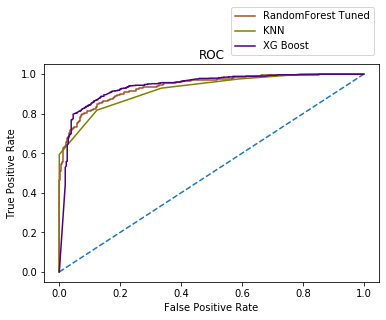

In [158]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_tuned_train_fpr, rf_tuned_train_tpr,color='sienna',label="RandomForest Tuned")
plt.plot(KNN_tune_train_fpr,KNN_tune_train_tpr,color='olive',label="KNN")
plt.plot(XG_train_fpr,XG_train_tpr,color='indigo',label="XG Boost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

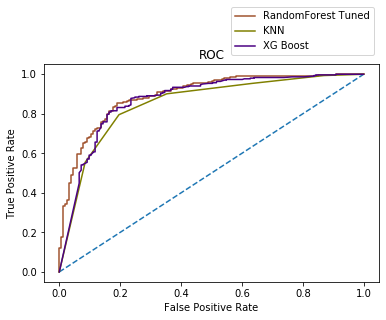

In [159]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_tuned_test_fpr, rf_tuned_test_tpr,color='sienna',label="RandomForest Tuned")
plt.plot(KNN_tune_test_fpr,KNN_tune_test_tpr,color='olive',label="KNN")
plt.plot(XG_test_fpr,XG_test_tpr,color='indigo',label="XG Boost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## Importing the libraries

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
import re
from nltk.stem.snowball import SnowballStemmer
import string
nltk.download('inaugural')


[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [161]:
from nltk.corpus import inaugural

## Reading the data

In [162]:
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [163]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [164]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

## Number of Characters

In [165]:
print ("The number of characters in Roosevelt's Speech =", len([char for sentence in inaugural.sents('1941-Roosevelt.txt') for word in sentence for char in word]))

The number of characters in Roosevelt's Speech = 6174


In [166]:
print ("The number of characters in Kennedy's Speech =", len([char for sentence in inaugural.sents('1961-Kennedy.txt') for word in sentence for char in word]))

The number of characters in Kennedy's Speech = 6202


In [167]:
print ("The number of characters in Nixon's Speech =", len([char for sentence in inaugural.sents('1973-Nixon.txt') for word in sentence for char in word]))

The number of characters in Nixon's Speech = 8122


## Number of words

In [168]:
print("The number of words in Roosevelt's Speech =")
len(inaugural.words('1941-Roosevelt.txt'))

The number of words in Roosevelt's Speech =


1536

In [169]:
print("The number of words in Kennedy's Speech =")
len(inaugural.words('1961-Kennedy.txt'))

The number of words in Kennedy's Speech =


1546

In [170]:
print("The number of words in Nixon's Speech =")
len(inaugural.words('1973-Nixon.txt'))

The number of words in Nixon's Speech =


2028

## Number of Sentences

In [171]:
print("The number of sentences in Roosevelt's Speech =")
len(inaugural.sents('1941-Roosevelt.txt'))

The number of sentences in Roosevelt's Speech =


68

In [172]:
roosevelt_sents1 = inaugural.sents('1941-Roosevelt.txt')

In [173]:
longest_len_roose = max(len(s) for s in roosevelt_sents1)
print(longest_len_roose)
[s for s in roosevelt_sents1 if len(s) == longest_len_roose]

74


[['The',
  'destiny',
  'of',
  'America',
  'was',
  'proclaimed',
  'in',
  'words',
  'of',
  'prophecy',
  'spoken',
  'by',
  'our',
  'first',
  'President',
  'in',
  'his',
  'first',
  'inaugural',
  'in',
  '1789',
  '--',
  'words',
  'almost',
  'directed',
  ',',
  'it',
  'would',
  'seem',
  ',',
  'to',
  'this',
  'year',
  'of',
  '1941',
  ':',
  '"',
  'The',
  'preservation',
  'of',
  'the',
  'sacred',
  'fire',
  'of',
  'liberty',
  'and',
  'the',
  'destiny',
  'of',
  'the',
  'republican',
  'model',
  'of',
  'government',
  'are',
  'justly',
  'considered',
  'deeply',
  ',',
  'finally',
  ',',
  'staked',
  'on',
  'the',
  'experiment',
  'intrusted',
  'to',
  'the',
  'hands',
  'of',
  'the',
  'American',
  'people',
  '."']]

In [174]:
smallest_len_roose = min(len(s) for s in roosevelt_sents1)
print(smallest_len_roose)
[s for s in roosevelt_sents1 if len(s) == smallest_len_roose]

5


[['Democracy', 'is', 'not', 'dying', '.'],
 ['It', 'is', 'human', 'history', '.'],
 ['We', 'do', 'not', 'retreat', '.']]

In [175]:
print("The number of sentences in Kennedy's Speech =")
len(inaugural.sents('1961-Kennedy.txt'))

The number of sentences in Kennedy's Speech =


52

In [176]:
kennedy_sents1=inaugural.sents('1961-Kennedy.txt')

In [177]:
longest_len_ken = max(len(s) for s in kennedy_sents1)
print(longest_len_ken)
[s for s in kennedy_sents1 if len(s) == longest_len_ken]

89


[['Let',
  'the',
  'word',
  'go',
  'forth',
  'from',
  'this',
  'time',
  'and',
  'place',
  ',',
  'to',
  'friend',
  'and',
  'foe',
  'alike',
  ',',
  'that',
  'the',
  'torch',
  'has',
  'been',
  'passed',
  'to',
  'a',
  'new',
  'generation',
  'of',
  'Americans',
  '--',
  'born',
  'in',
  'this',
  'century',
  ',',
  'tempered',
  'by',
  'war',
  ',',
  'disciplined',
  'by',
  'a',
  'hard',
  'and',
  'bitter',
  'peace',
  ',',
  'proud',
  'of',
  'our',
  'ancient',
  'heritage',
  '--',
  'and',
  'unwilling',
  'to',
  'witness',
  'or',
  'permit',
  'the',
  'slow',
  'undoing',
  'of',
  'those',
  'human',
  'rights',
  'to',
  'which',
  'this',
  'Nation',
  'has',
  'always',
  'been',
  'committed',
  ',',
  'and',
  'to',
  'which',
  'we',
  'are',
  'committed',
  'today',
  'at',
  'home',
  'and',
  'around',
  'the',
  'world',
  '.']]

In [178]:
smallest_len_ken = min(len(s) for s in kennedy_sents1)
print(smallest_len_ken)
[s for s in kennedy_sents1 if len(s) == smallest_len_ken]

5


[['But', 'let', 'us', 'begin', '.']]

In [179]:
print("The number of sentences in Nixon's Speech =")
len(inaugural.sents('1973-Nixon.txt'))

The number of sentences in Nixon's Speech =


69

In [180]:
Nixon_sents1 = inaugural.sents('1973-Nixon.txt')

In [181]:
longest_len_nix = max(len(s) for s in Nixon_sents1)
print(longest_len_nix)
[s for s in Nixon_sents1 if len(s) == longest_len_nix]

82


[['From',
  'this',
  'day',
  'forward',
  ',',
  'let',
  'each',
  'of',
  'us',
  'make',
  'a',
  'solemn',
  'commitment',
  'in',
  'his',
  'own',
  'heart',
  ':',
  'to',
  'bear',
  'his',
  'responsibility',
  ',',
  'to',
  'do',
  'his',
  'part',
  ',',
  'to',
  'live',
  'his',
  'ideals',
  '--',
  'so',
  'that',
  'together',
  ',',
  'we',
  'can',
  'see',
  'the',
  'dawn',
  'of',
  'a',
  'new',
  'age',
  'of',
  'progress',
  'for',
  'America',
  ',',
  'and',
  'together',
  ',',
  'as',
  'we',
  'celebrate',
  'our',
  '200th',
  'anniversary',
  'as',
  'a',
  'nation',
  ',',
  'we',
  'can',
  'do',
  'so',
  'proud',
  'in',
  'the',
  'fulfillment',
  'of',
  'our',
  'promise',
  'to',
  'ourselves',
  'and',
  'to',
  'the',
  'world',
  '.']]

In [182]:
smallest_len_nix = min(len(s) for s in Nixon_sents1)
print(smallest_len_nix)
[s for s in Nixon_sents1 if len(s) == smallest_len_nix]

5


[['This', 'is', 'human', 'nature', '.']]

### Most Frequent words without removing Stop Words

In [183]:
nltk.FreqDist(inaugural.words('1941-Roosevelt.txt')).most_common(10)

[('the', 104),
 ('of', 81),
 (',', 77),
 ('.', 67),
 ('and', 44),
 ('to', 35),
 ('in', 30),
 ('a', 29),
 ('--', 25),
 ('is', 24)]

In [184]:
nltk.FreqDist(inaugural.words('1961-Kennedy.txt')).most_common(10)

[(',', 85),
 ('the', 83),
 ('of', 65),
 ('.', 51),
 ('to', 38),
 ('and', 37),
 ('a', 29),
 ('we', 27),
 ('--', 25),
 ('in', 24)]

In [185]:
nltk.FreqDist(inaugural.words('1973-Nixon.txt')).most_common(10)

[(',', 96),
 ('the', 80),
 ('.', 68),
 ('of', 68),
 ('to', 65),
 ('in', 54),
 ('and', 47),
 ('we', 38),
 ('a', 34),
 ('that', 32)]

## Sentence Tokenizing

In [186]:
from nltk.tokenize import sent_tokenize

In [187]:
roosevelt_sent = sent_tokenize(inaugural.raw('1941-Roosevelt.txt'))

In [188]:
roosevelt_sent

['On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.',
 "In Washington's day the task of the people was to create and weld together a nation.",
 "In Lincoln's day the task of the people was to preserve that Nation from disruption from within.",
 'In this day the task of the people is to save that Nation and its institutions from disruption from without.',
 'To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be.',
 'If we do not, we risk the real peril of inaction.',
 'Lives of nations are determined not by the count of years, but by the lifetime of the human spirit.',
 'The life of a man is three-score years and ten: a little more, a little less.',
 'The life of a nation is the fullness of the measure of its will to live.',
 'There are men who doubt this.',
 'There are men wh

In [189]:
len(roosevelt_sent)

68

In [190]:
Kennedy_sent = sent_tokenize(inaugural.raw('1961-Kennedy.txt'))

In [191]:
Kennedy_sent

['Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change.',
 'For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.',
 'The world is very different now.',
 'For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life.',
 'And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.',
 'We dare not forget today that we are the heirs of that first revolution.',
 'Let the word go forth from this time and place, to friend and foe alike, that the torch has been pa

In [192]:
len(Kennedy_sent)

52

In [193]:
Nixon_sent = sent_tokenize(inaugural.raw('1973-Nixon.txt'))

In [194]:
Nixon_sent

['Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.',
 'As we meet here today, we stand on the threshold of a new era of peace in the world.',
 'The central question before us is: How shall we use that peace?',
 'Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.',
 'Let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.',
 'This past year saw far-reaching results from our new policies for peace.',
 'By continuing to revitalize ou

In [195]:
len(Nixon_sent)

68

## Word Tokenize

In [196]:
from nltk.tokenize import word_tokenize

In [197]:
roosevelt_word = word_tokenize(inaugural.raw('1941-Roosevelt.txt'))

In [198]:
roosevelt_word

['On',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789',
 ',',
 'the',
 'people',
 'have',
 'renewed',
 'their',
 'sense',
 'of',
 'dedication',
 'to',
 'the',
 'United',
 'States',
 '.',
 'In',
 'Washington',
 "'s",
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'create',
 'and',
 'weld',
 'together',
 'a',
 'nation',
 '.',
 'In',
 'Lincoln',
 "'s",
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'preserve',
 'that',
 'Nation',
 'from',
 'disruption',
 'from',
 'within',
 '.',
 'In',
 'this',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'is',
 'to',
 'save',
 'that',
 'Nation',
 'and',
 'its',
 'institutions',
 'from',
 'disruption',
 'from',
 'without',
 '.',
 'To',
 'us',
 'there',
 'has',
 'come',
 'a',
 'time',
 ',',
 'in',
 'the',
 'midst',
 'of',
 'swift',
 'happenings',
 ',',
 'to',
 'pause',
 'for',
 'a',
 'moment',
 'and',
 'take',
 'stock',
 '--',
 'to',
 'recall',
 'what',
 'our',
 'place',
 'in',
 'histor

In [199]:
len(roosevelt_word)

1526

In [200]:
kennedy_word = word_tokenize(inaugural.raw('1961-Kennedy.txt'))

In [201]:
len(kennedy_word)

1543

In [202]:
nixon_word = word_tokenize(inaugural.raw('1973-Nixon.txt'))

In [203]:
len(nixon_word)

2006

In [204]:
nixon_word

['Mr.',
 'Vice',
 'President',
 ',',
 'Mr.',
 'Speaker',
 ',',
 'Mr.',
 'Chief',
 'Justice',
 ',',
 'Senator',
 'Cook',
 ',',
 'Mrs.',
 'Eisenhower',
 ',',
 'and',
 'my',
 'fellow',
 'citizens',
 'of',
 'this',
 'great',
 'and',
 'good',
 'country',
 'we',
 'share',
 'together',
 ':',
 'When',
 'we',
 'met',
 'here',
 'four',
 'years',
 'ago',
 ',',
 'America',
 'was',
 'bleak',
 'in',
 'spirit',
 ',',
 'depressed',
 'by',
 'the',
 'prospect',
 'of',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'and',
 'of',
 'destructive',
 'conflict',
 'at',
 'home',
 '.',
 'As',
 'we',
 'meet',
 'here',
 'today',
 ',',
 'we',
 'stand',
 'on',
 'the',
 'threshold',
 'of',
 'a',
 'new',
 'era',
 'of',
 'peace',
 'in',
 'the',
 'world',
 '.',
 'The',
 'central',
 'question',
 'before',
 'us',
 'is',
 ':',
 'How',
 'shall',
 'we',
 'use',
 'that',
 'peace',
 '?',
 'Let',
 'us',
 'resolve',
 'that',
 'this',
 'era',
 'we',
 'are',
 'about',
 'to',
 'enter',
 'will',
 'not',
 'be',
 'what',
 'other',
 'p

## Tree bank Word Tokenizer

In [205]:
from nltk.tokenize import TreebankWordTokenizer

In [206]:
tok2 = TreebankWordTokenizer()

In [207]:
roosevelt_word2 = tok2.tokenize(inaugural.raw('1941-Roosevelt.txt'))

In [208]:
roosevelt_word2

['On',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789',
 ',',
 'the',
 'people',
 'have',
 'renewed',
 'their',
 'sense',
 'of',
 'dedication',
 'to',
 'the',
 'United',
 'States.',
 'In',
 'Washington',
 "'s",
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'create',
 'and',
 'weld',
 'together',
 'a',
 'nation.',
 'In',
 'Lincoln',
 "'s",
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'preserve',
 'that',
 'Nation',
 'from',
 'disruption',
 'from',
 'within.',
 'In',
 'this',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'is',
 'to',
 'save',
 'that',
 'Nation',
 'and',
 'its',
 'institutions',
 'from',
 'disruption',
 'from',
 'without.',
 'To',
 'us',
 'there',
 'has',
 'come',
 'a',
 'time',
 ',',
 'in',
 'the',
 'midst',
 'of',
 'swift',
 'happenings',
 ',',
 'to',
 'pause',
 'for',
 'a',
 'moment',
 'and',
 'take',
 'stock',
 '--',
 'to',
 'recall',
 'what',
 'our',
 'place',
 'in',
 'history',
 'has',
 'been',

In [209]:
len(roosevelt_word2)

1459

In [210]:
kennedy_word2 = tok2.tokenize(inaugural.raw('1961-Kennedy.txt'))

In [211]:
len(kennedy_word2)

1494

In [212]:
nixon_word2 = tok2.tokenize(inaugural.raw('1973-Nixon.txt'))

In [213]:
len(nixon_word2)

1942

In [214]:
nixon_word2

['Mr.',
 'Vice',
 'President',
 ',',
 'Mr.',
 'Speaker',
 ',',
 'Mr.',
 'Chief',
 'Justice',
 ',',
 'Senator',
 'Cook',
 ',',
 'Mrs.',
 'Eisenhower',
 ',',
 'and',
 'my',
 'fellow',
 'citizens',
 'of',
 'this',
 'great',
 'and',
 'good',
 'country',
 'we',
 'share',
 'together',
 ':',
 'When',
 'we',
 'met',
 'here',
 'four',
 'years',
 'ago',
 ',',
 'America',
 'was',
 'bleak',
 'in',
 'spirit',
 ',',
 'depressed',
 'by',
 'the',
 'prospect',
 'of',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'and',
 'of',
 'destructive',
 'conflict',
 'at',
 'home.',
 'As',
 'we',
 'meet',
 'here',
 'today',
 ',',
 'we',
 'stand',
 'on',
 'the',
 'threshold',
 'of',
 'a',
 'new',
 'era',
 'of',
 'peace',
 'in',
 'the',
 'world.',
 'The',
 'central',
 'question',
 'before',
 'us',
 'is',
 ':',
 'How',
 'shall',
 'we',
 'use',
 'that',
 'peace',
 '?',
 'Let',
 'us',
 'resolve',
 'that',
 'this',
 'era',
 'we',
 'are',
 'about',
 'to',
 'enter',
 'will',
 'not',
 'be',
 'what',
 'other',
 'postwar',
 

## WordPunct Tokenizer

In [215]:
from nltk.tokenize import WordPunctTokenizer
tok3=WordPunctTokenizer()

In [216]:
roosevelt_word3 = tok3.tokenize(inaugural.raw('1941-Roosevelt.txt'))

In [217]:
len(roosevelt_word3)

1536

In [218]:
kennedy_word3 = tok3.tokenize(inaugural.raw('1961-Kennedy.txt'))

In [219]:
len(kennedy_word3)

1546

In [220]:
nixon_word3 = tok3.tokenize(inaugural.raw('1973-Nixon.txt'))

In [221]:
len(nixon_word3)

2028

In [222]:
nixon_word3

['Mr',
 '.',
 'Vice',
 'President',
 ',',
 'Mr',
 '.',
 'Speaker',
 ',',
 'Mr',
 '.',
 'Chief',
 'Justice',
 ',',
 'Senator',
 'Cook',
 ',',
 'Mrs',
 '.',
 'Eisenhower',
 ',',
 'and',
 'my',
 'fellow',
 'citizens',
 'of',
 'this',
 'great',
 'and',
 'good',
 'country',
 'we',
 'share',
 'together',
 ':',
 'When',
 'we',
 'met',
 'here',
 'four',
 'years',
 'ago',
 ',',
 'America',
 'was',
 'bleak',
 'in',
 'spirit',
 ',',
 'depressed',
 'by',
 'the',
 'prospect',
 'of',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'and',
 'of',
 'destructive',
 'conflict',
 'at',
 'home',
 '.',
 'As',
 'we',
 'meet',
 'here',
 'today',
 ',',
 'we',
 'stand',
 'on',
 'the',
 'threshold',
 'of',
 'a',
 'new',
 'era',
 'of',
 'peace',
 'in',
 'the',
 'world',
 '.',
 'The',
 'central',
 'question',
 'before',
 'us',
 'is',
 ':',
 'How',
 'shall',
 'we',
 'use',
 'that',
 'peace',
 '?',
 'Let',
 'us',
 'resolve',
 'that',
 'this',
 'era',
 'we',
 'are',
 'about',
 'to',
 'enter',
 'will',
 'not',
 'be',
 '

## Removing Stop Words

### For Roosevelt

In [223]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

In [224]:
all_words_roosevelt = (w.lower() for w in inaugural.words('1941-Roosevelt.txt'))
all_words_clean_roosevelt  = [word for word in all_words_roosevelt  if word not in stopwords]



all_words_freq_roosevelt  = nltk.FreqDist(all_words_clean_roosevelt)

word_features_roosevelt  = [item[0] for item in all_words_freq_roosevelt.most_common(200)]

In [225]:
processed_features_roosevelt =[]

for sentence in range(0,len(word_features_roosevelt)):
    
    processed_feature_roosevelt = re.sub(r'\W', ' ', str(word_features_roosevelt[sentence]))
    
    processed_feature_roosevelt = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature_roosevelt)
    
    processed_feature_roosevelt = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature_roosevelt) 
    processed_feature_roosevelt = re.sub(r'\s+', ' ', processed_feature_roosevelt, flags=re.I)
    processed_feature_roosevelt = re.sub(r'^b\s+', '', processed_feature_roosevelt)
    processed_feature_roosevelt = processed_feature_roosevelt.lower()
    processed_features_roosevelt.append(processed_feature_roosevelt)


In [226]:
nltk.FreqDist(processed_features_roosevelt).most_common(3)

[(' ', 1), ('nation', 1), ('know', 1)]

In [227]:
word_features_roosevelt 

['--',
 'nation',
 'know',
 'spirit',
 'life',
 'democracy',
 'us',
 'people',
 'america',
 'years',
 'freedom',
 'human',
 'men',
 'new',
 'body',
 'mind',
 'speaks',
 'day',
 'states',
 'government',
 'must',
 'something',
 'faith',
 'united',
 'task',
 'within',
 'history',
 'nations',
 'three',
 'live',
 'future',
 'free',
 'alone',
 'still',
 'every',
 'continent',
 'like',
 'person',
 'world',
 'sacred',
 'came',
 'first',
 'destiny',
 'national',
 '1789',
 'sense',
 'washington',
 'create',
 'together',
 'disruption',
 'without',
 'come',
 'time',
 'midst',
 'stock',
 'may',
 'lives',
 'little',
 'measure',
 'doubt',
 'measured',
 'americans',
 'true',
 'republic',
 'acted',
 'security',
 'things',
 'present',
 'many',
 'built',
 'maintained',
 'constitution',
 'freely',
 'american',
 'seen',
 'cannot',
 'enterprise',
 'forms',
 'hopes',
 'find',
 'even',
 'upon',
 'early',
 'peoples',
 'written',
 'land',
 'could',
 'forward',
 'go',
 'enough',
 'would',
 'seem',
 'old',
 'word

In [228]:
 processed_features_roosevelt

[' ',
 'nation',
 'know',
 'spirit',
 'life',
 'democracy',
 'us',
 'people',
 'america',
 'years',
 'freedom',
 'human',
 'men',
 'new',
 'body',
 'mind',
 'speaks',
 'day',
 'states',
 'government',
 'must',
 'something',
 'faith',
 'united',
 'task',
 'within',
 'history',
 'nations',
 'three',
 'live',
 'future',
 'free',
 'alone',
 'still',
 'every',
 'continent',
 'like',
 'person',
 'world',
 'sacred',
 'came',
 'first',
 'destiny',
 'national',
 '1789',
 'sense',
 'washington',
 'create',
 'together',
 'disruption',
 'without',
 'come',
 'time',
 'midst',
 'stock',
 'may',
 'lives',
 'little',
 'measure',
 'doubt',
 'measured',
 'americans',
 'true',
 'republic',
 'acted',
 'security',
 'things',
 'present',
 'many',
 'built',
 'maintained',
 'constitution',
 'freely',
 'american',
 'seen',
 'cannot',
 'enterprise',
 'forms',
 'hopes',
 'find',
 'even',
 'upon',
 'early',
 'peoples',
 'written',
 'land',
 'could',
 'forward',
 'go',
 'enough',
 'would',
 'seem',
 'old',
 'words

### For Kennedy

In [229]:
all_words_kennedy = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
all_words_clean_kennedy = [word for word in all_words_kennedy  if word not in stopwords]



all_words_freq_kennedy  = nltk.FreqDist(all_words_clean_kennedy)

word_features_kennedy  = [item[0] for item in all_words_freq_kennedy.most_common(200)]

In [230]:
processed_features_kennedy =[]

for sentence in range(0,len(word_features_kennedy)):
    
    processed_feature_kennedy = re.sub(r'\W', ' ', str(word_features_kennedy[sentence]))
    
    processed_feature_kennedy = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature_kennedy)
    
    processed_feature_kennedy = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature_kennedy) 
    processed_feature_kennedy = re.sub(r'\s+', ' ', processed_feature_kennedy, flags=re.I)
    processed_feature_kennedy = re.sub(r'^b\s+', '', processed_feature_kennedy)
    processed_feature_kennedy = processed_feature_kennedy.lower()
    processed_features_kennedy.append(processed_feature_kennedy)

In [231]:
word_features_kennedy

['--',
 'let',
 'us',
 'world',
 'sides',
 'new',
 'pledge',
 'citizens',
 'power',
 'shall',
 'free',
 'nations',
 'ask',
 'president',
 'fellow',
 'freedom',
 'man',
 'first',
 'americans',
 'war',
 'peace',
 'always',
 'cannot',
 'hope',
 'help',
 'arms',
 'country',
 'call',
 'today',
 'well',
 'god',
 'human',
 'poverty',
 'life',
 'globe',
 'dare',
 'go',
 'generation',
 'know',
 'bear',
 'control',
 'may',
 'good',
 'join',
 'begin',
 'never',
 'final',
 'vice',
 'mr',
 'forebears',
 'century',
 'hands',
 'forms',
 'yet',
 'around',
 'rights',
 'hand',
 'revolution',
 'word',
 'forth',
 'time',
 'friend',
 'foe',
 'passed',
 'nation',
 'committed',
 'every',
 'whether',
 'burden',
 'meet',
 'support',
 'oppose',
 'assure',
 'success',
 'loyalty',
 'united',
 'little',
 'powerful',
 'states',
 'welcome',
 'merely',
 'far',
 'tyranny',
 'find',
 'supporting',
 'back',
 'best',
 'seek',
 'south',
 'offer',
 'deeds',
 'alliance',
 'powers',
 'instruments',
 'weak',
 'finally',
 'wou

In [232]:
len(word_features_kennedy)

200

In [233]:
processed_features_kennedy

[' ',
 'let',
 'us',
 'world',
 'sides',
 'new',
 'pledge',
 'citizens',
 'power',
 'shall',
 'free',
 'nations',
 'ask',
 'president',
 'fellow',
 'freedom',
 'man',
 'first',
 'americans',
 'war',
 'peace',
 'always',
 'cannot',
 'hope',
 'help',
 'arms',
 'country',
 'call',
 'today',
 'well',
 'god',
 'human',
 'poverty',
 'life',
 'globe',
 'dare',
 'go',
 'generation',
 'know',
 'bear',
 'control',
 'may',
 'good',
 'join',
 'begin',
 'never',
 'final',
 'vice',
 'mr',
 'forebears',
 'century',
 'hands',
 'forms',
 'yet',
 'around',
 'rights',
 'hand',
 'revolution',
 'word',
 'forth',
 'time',
 'friend',
 'foe',
 'passed',
 'nation',
 'committed',
 'every',
 'whether',
 'burden',
 'meet',
 'support',
 'oppose',
 'assure',
 'success',
 'loyalty',
 'united',
 'little',
 'powerful',
 'states',
 'welcome',
 'merely',
 'far',
 'tyranny',
 'find',
 'supporting',
 'back',
 'best',
 'seek',
 'south',
 'offer',
 'deeds',
 'alliance',
 'powers',
 'instruments',
 'weak',
 'finally',
 'woul

### For Nixon

In [234]:
all_words_nixon = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
all_words_clean_nixon = [word for word in all_words_nixon  if word not in stopwords]



all_words_freq_nixon  = nltk.FreqDist(all_words_clean_nixon)

word_features_nixon  = [item[0] for item in all_words_freq_nixon.most_common(200)]

In [235]:
processed_features_nixon =[]

for sentence in range(0,len(word_features_nixon)):
    
    processed_feature_nixon = re.sub(r'\W', ' ', str(word_features_nixon[sentence]))
    
    processed_feature_nixon = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature_nixon)
    
    processed_feature_nixon = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature_nixon) 
    processed_feature_nixon = re.sub(r'\s+', ' ', processed_feature_nixon, flags=re.I)
    processed_feature_nixon = re.sub(r'^b\s+', '', processed_feature_nixon)
    processed_feature_nixon = processed_feature_nixon.lower()
    processed_features_nixon.append(processed_feature_nixon)

In [236]:
word_features_nixon

['us',
 'let',
 'america',
 'peace',
 'world',
 '--',
 'new',
 'nation',
 'responsibility',
 'government',
 'great',
 'home',
 'abroad',
 'together',
 'years',
 'shall',
 'policies',
 'role',
 'make',
 'every',
 'history',
 'better',
 'time',
 'right',
 'people',
 'help',
 'four',
 'today',
 'era',
 'responsibilities',
 'progress',
 'come',
 'respect',
 'others',
 'act',
 'one',
 'promise',
 'long',
 'work',
 'freedom',
 'god',
 'old',
 'proud',
 'faith',
 'mr',
 'country',
 'share',
 'war',
 'resolve',
 'retreat',
 'greatly',
 'century',
 'nations',
 'bold',
 'end',
 'another',
 'future',
 'forward',
 'build',
 'structure',
 'live',
 'system',
 'gladly',
 'challenges',
 'away',
 'way',
 'individual',
 'ask',
 'ashamed',
 'think',
 'spirit',
 'conflict',
 'meet',
 'stand',
 'use',
 'enter',
 'leads',
 'danger',
 'renew',
 'past',
 'year',
 'far',
 'initiatives',
 'toward',
 'merely',
 'wars',
 'generations',
 'important',
 'understand',
 'unless',
 'preserve',
 'nature',
 'force',
 'co

In [237]:
processed_features_nixon

['us',
 'let',
 'america',
 'peace',
 'world',
 ' ',
 'new',
 'nation',
 'responsibility',
 'government',
 'great',
 'home',
 'abroad',
 'together',
 'years',
 'shall',
 'policies',
 'role',
 'make',
 'every',
 'history',
 'better',
 'time',
 'right',
 'people',
 'help',
 'four',
 'today',
 'era',
 'responsibilities',
 'progress',
 'come',
 'respect',
 'others',
 'act',
 'one',
 'promise',
 'long',
 'work',
 'freedom',
 'god',
 'old',
 'proud',
 'faith',
 'mr',
 'country',
 'share',
 'war',
 'resolve',
 'retreat',
 'greatly',
 'century',
 'nations',
 'bold',
 'end',
 'another',
 'future',
 'forward',
 'build',
 'structure',
 'live',
 'system',
 'gladly',
 'challenges',
 'away',
 'way',
 'individual',
 'ask',
 'ashamed',
 'think',
 'spirit',
 'conflict',
 'meet',
 'stand',
 'use',
 'enter',
 'leads',
 'danger',
 'renew',
 'past',
 'year',
 'far',
 'initiatives',
 'toward',
 'merely',
 'wars',
 'generations',
 'important',
 'understand',
 'unless',
 'preserve',
 'nature',
 'force',
 'con

In [238]:
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

## Word Cloud

### Roosevelt

In [239]:
from wordcloud import WordCloud, STOPWORDS 

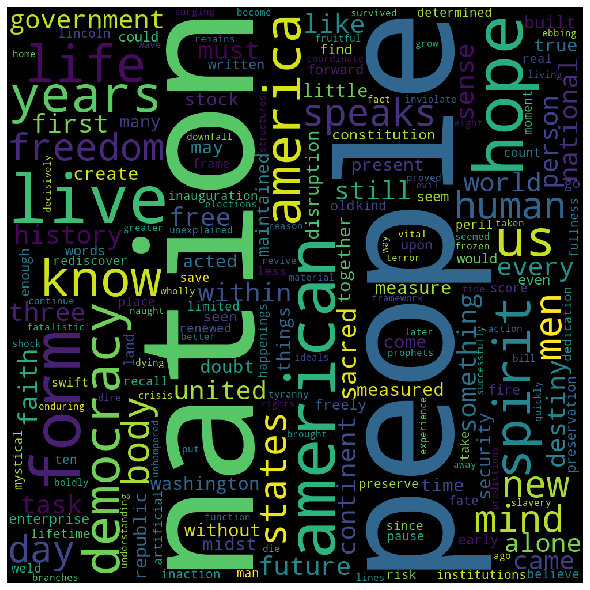

In [240]:
filtered_sentence = [] #empty list
for i in processed_features_roosevelt: # iterating in processes features through each sentence
    word_tokens = word_tokenize(i) # converting each sentence to a token
    for w in word_tokens:#in each token, removing stopwords from english language
        if w not in stopwords:
            filtered_sentence.append(w) #appending non-stopwords to filtered_sentence list

comment_words = ' ' #empty string


for words in filtered_sentence:
    comment_words = comment_words + words + ' ' #converting to string
          
            
wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()  #intialise stopwords from English Language



### Kennedy

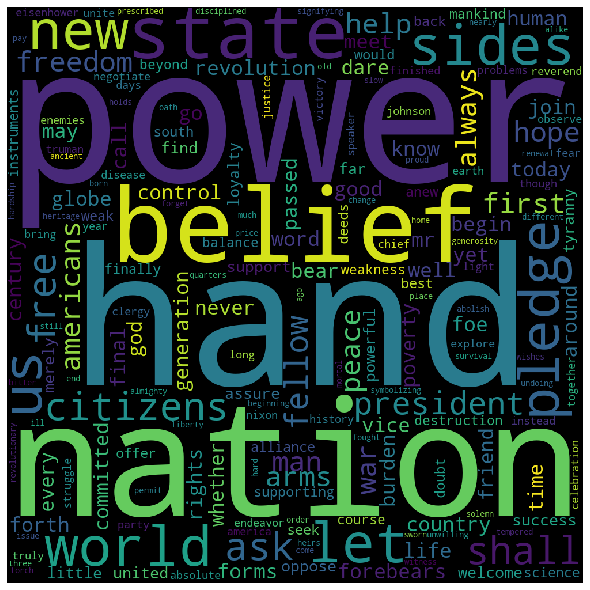

In [241]:
filtered_sentence = [] #empty list
for i in processed_features_kennedy: # iterating in processes features through each sentence
    word_tokens = word_tokenize(i) # converting each sentence to a token
    for w in word_tokens:#in each token, removing stopwords from english language
        if w not in stopwords:
            filtered_sentence.append(w) #appending non-stopwords to filtered_sentence list

comment_words = ' ' #empty string


for words in filtered_sentence:
    comment_words = comment_words + words + ' ' #converting to string
          
            
wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()  #intialise stopwords from English Language


### Nixon

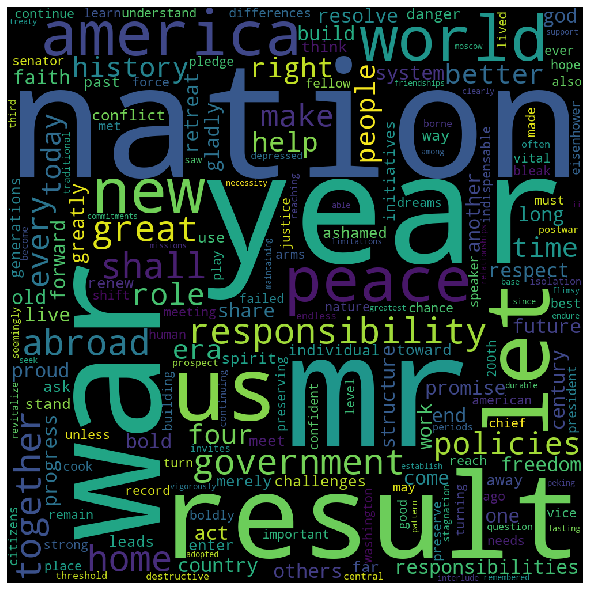

In [242]:
filtered_sentence = [] #empty list
for i in processed_features_nixon: # iterating in processes features through each sentence
    word_tokens = word_tokenize(i) # converting each sentence to a token
    for w in word_tokens:#in each token, removing stopwords from english language
        if w not in stopwords:
            filtered_sentence.append(w) #appending non-stopwords to filtered_sentence list

comment_words = ' ' #empty string


for words in filtered_sentence:
    comment_words = comment_words + words + ' ' #converting to string
          
            
wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()  #intialise stopwords from English Language
